In [ ]:
import pandas as pd

def display_examples(df, label, num_examples=2):
    print(f"\n{'='*40}\n{label.upper()} EXAMPLES\n{'='*40}\n")

    # Group by dialogue
    grouped = list(df.groupby('dialogue'))

    # Print only the first `num_examples`
    for i, (dialogue, group) in enumerate(grouped[:num_examples], 1):
        dialogue_length = len(dialogue.split())
        print(f"Example {i} (Length: {dialogue_length} words)")
        print(f"Dialogue:\n{dialogue.strip()}\n")

        reference = group['reference_summary'].iloc[0]
        print(f"Reference Summary:\n{reference.strip()}\n")

        print("Generated Summaries:")
        for _, row in group.iterrows():
            print(f"  Model: {row['model']}")
            print(f"  Generated: {row['generated_summary'].strip()}\n")

        print("-" * 100)

    # Find the longest dialogue
    longest = max(grouped, key=lambda x: len(x[0].split()))
    dialogue, group = longest
    dialogue_length = len(dialogue.split())

    print(f"\n{'='*40}\nLONGEST DIALOGUE - {label.upper()} (Length: {dialogue_length} words)\n{'='*40}\n")
    print(f"Dialogue:\n{dialogue.strip()}\n")

    reference = group['reference_summary'].iloc[0]
    print(f"Reference Summary:\n{reference.strip()}\n")

    print("Generated Summaries:")
    for _, row in group.iterrows():
        print(f"  Model: {row['model']}")
        print(f"  Generated: {row['generated_summary'].strip()}\n")

    print("-" * 100)


# Load data
clean_df = pd.read_csv('../results/clean_qualitative_analysis.csv')
unclean_df = pd.read_csv('../results/unclean_qualitative_analysis.csv')

# Display examples and longest dialogue for each
display_examples(clean_df, label='Clean')
display_examples(unclean_df, label='Unclean')



CLEAN EXAMPLES

Example 1 (Length: 173 words)
Dialogue:
abby have you talk to miro dylan no not really I have never have an opportunity brandon I neither but he seem a nice guy brenda you meet he yesterday at the party abby yes he be so interesting abby tell I the story of his father come from albania to the us in the early 1990 dylan really I have no idea he be albanian abby he be he speak only albanian with his parent dylan fascinating where do he come from in albania abby from the seacoast abby duress I believe he tell I they be not from tirana dylan what else do he tell you abby that they leave kind of illegally abby it be a big mess and extreme poverty everywhere abby then suddenly the border be open and they just leave abby people be board available ship whatever just to get out of there abby he show I some picture like dylan insane abby yes and his father be among the people dylan scary but interesting abby very

Reference Summary:
Miro speaks Albanian with his parents. His fam

Example 1
Dialogue:
abby have you talk to miro dylan no not really I have never have an opportunity brandon I neither but he seem a nice guy brenda you meet he yesterday at the party abby yes he be so interesting abby tell I the story of his father come from albania to the us in the early 1990 dylan really I have no idea he be albanian abby he be he speak only albanian with his parent dylan fascinating where do he come from in albania abby from the seacoast abby duress I believe he tell I they be not from tirana dylan what else do he tell you abby that they leave kind of illegally abby it be a big mess and extreme poverty everywhere abby then suddenly the border be open and they just leave abby people be board available ship whatever just to get out of there abby he show I some picture like dylan insane abby yes and his father be among the people dylan scary but interesting abby very

Reference Summary:
Miro speaks Albanian with his parents. His family left Albania illegally in 1990s.


In [3]:
import torch
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import List
clean_df = pd.read_csv('../results/clean_qualitative_analysis.csv')
unclean_df = pd.read_csv('../results/unclean_qualitative_analysis.csv')

def plot_model_summary_distributions(clean_df: pd.DataFrame, unclean_df: pd.DataFrame, save_dir: str = None):
    """
    Plots summary length distributions for each model and data type (clean/unclean).

    Args:
        clean_df (pd.DataFrame): DataFrame with clean data. Should have columns: 'Model', 'Generated Summary', 'Reference Summary'
        unclean_df (pd.DataFrame): DataFrame with unclean data. Same structure as clean_df.
        save_dir (str): Directory to save the plots. Plots will be saved as PNGs named by data type.
    """
    
    def plot_distributions(df: pd.DataFrame, title_prefix: str, filename: str):
        models = df['model'].unique()
        n_models = len(models)
        fig, axs = plt.subplots(n_models, 1, figsize=(12, 4 * n_models), sharex=True)
        if n_models == 1:
            axs = [axs]

        for i, model in enumerate(models):
            model_df = df[df['model'] == model]
            gen_lens = model_df['generated_summary'].apply(lambda x: len(str(x).split()))
            ref_lens = model_df['reference_summary'].apply(lambda x: len(str(x).split()))

            sns.histplot(gen_lens, color='blue', label='Generated', kde=True, bins=30, ax=axs[i], alpha=0.5)
            sns.histplot(ref_lens, color='green', label='Reference', kde=True, bins=30, ax=axs[i], alpha=0.5)

            axs[i].set_title(f"{title_prefix}: {model}")
            axs[i].set_xlabel("Number of Tokens")
            axs[i].set_ylabel("Frequency")
            axs[i].legend()
            axs[i].grid(alpha=0.3)

        plt.tight_layout()
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
        plt.close()

    plot_distributions(clean_df, "Clean Data", "clean_summary_distributions_post_inference.png")
    plot_distributions(unclean_df, "Unclean Data", "unclean_summary_distributions_ost_inference.png")


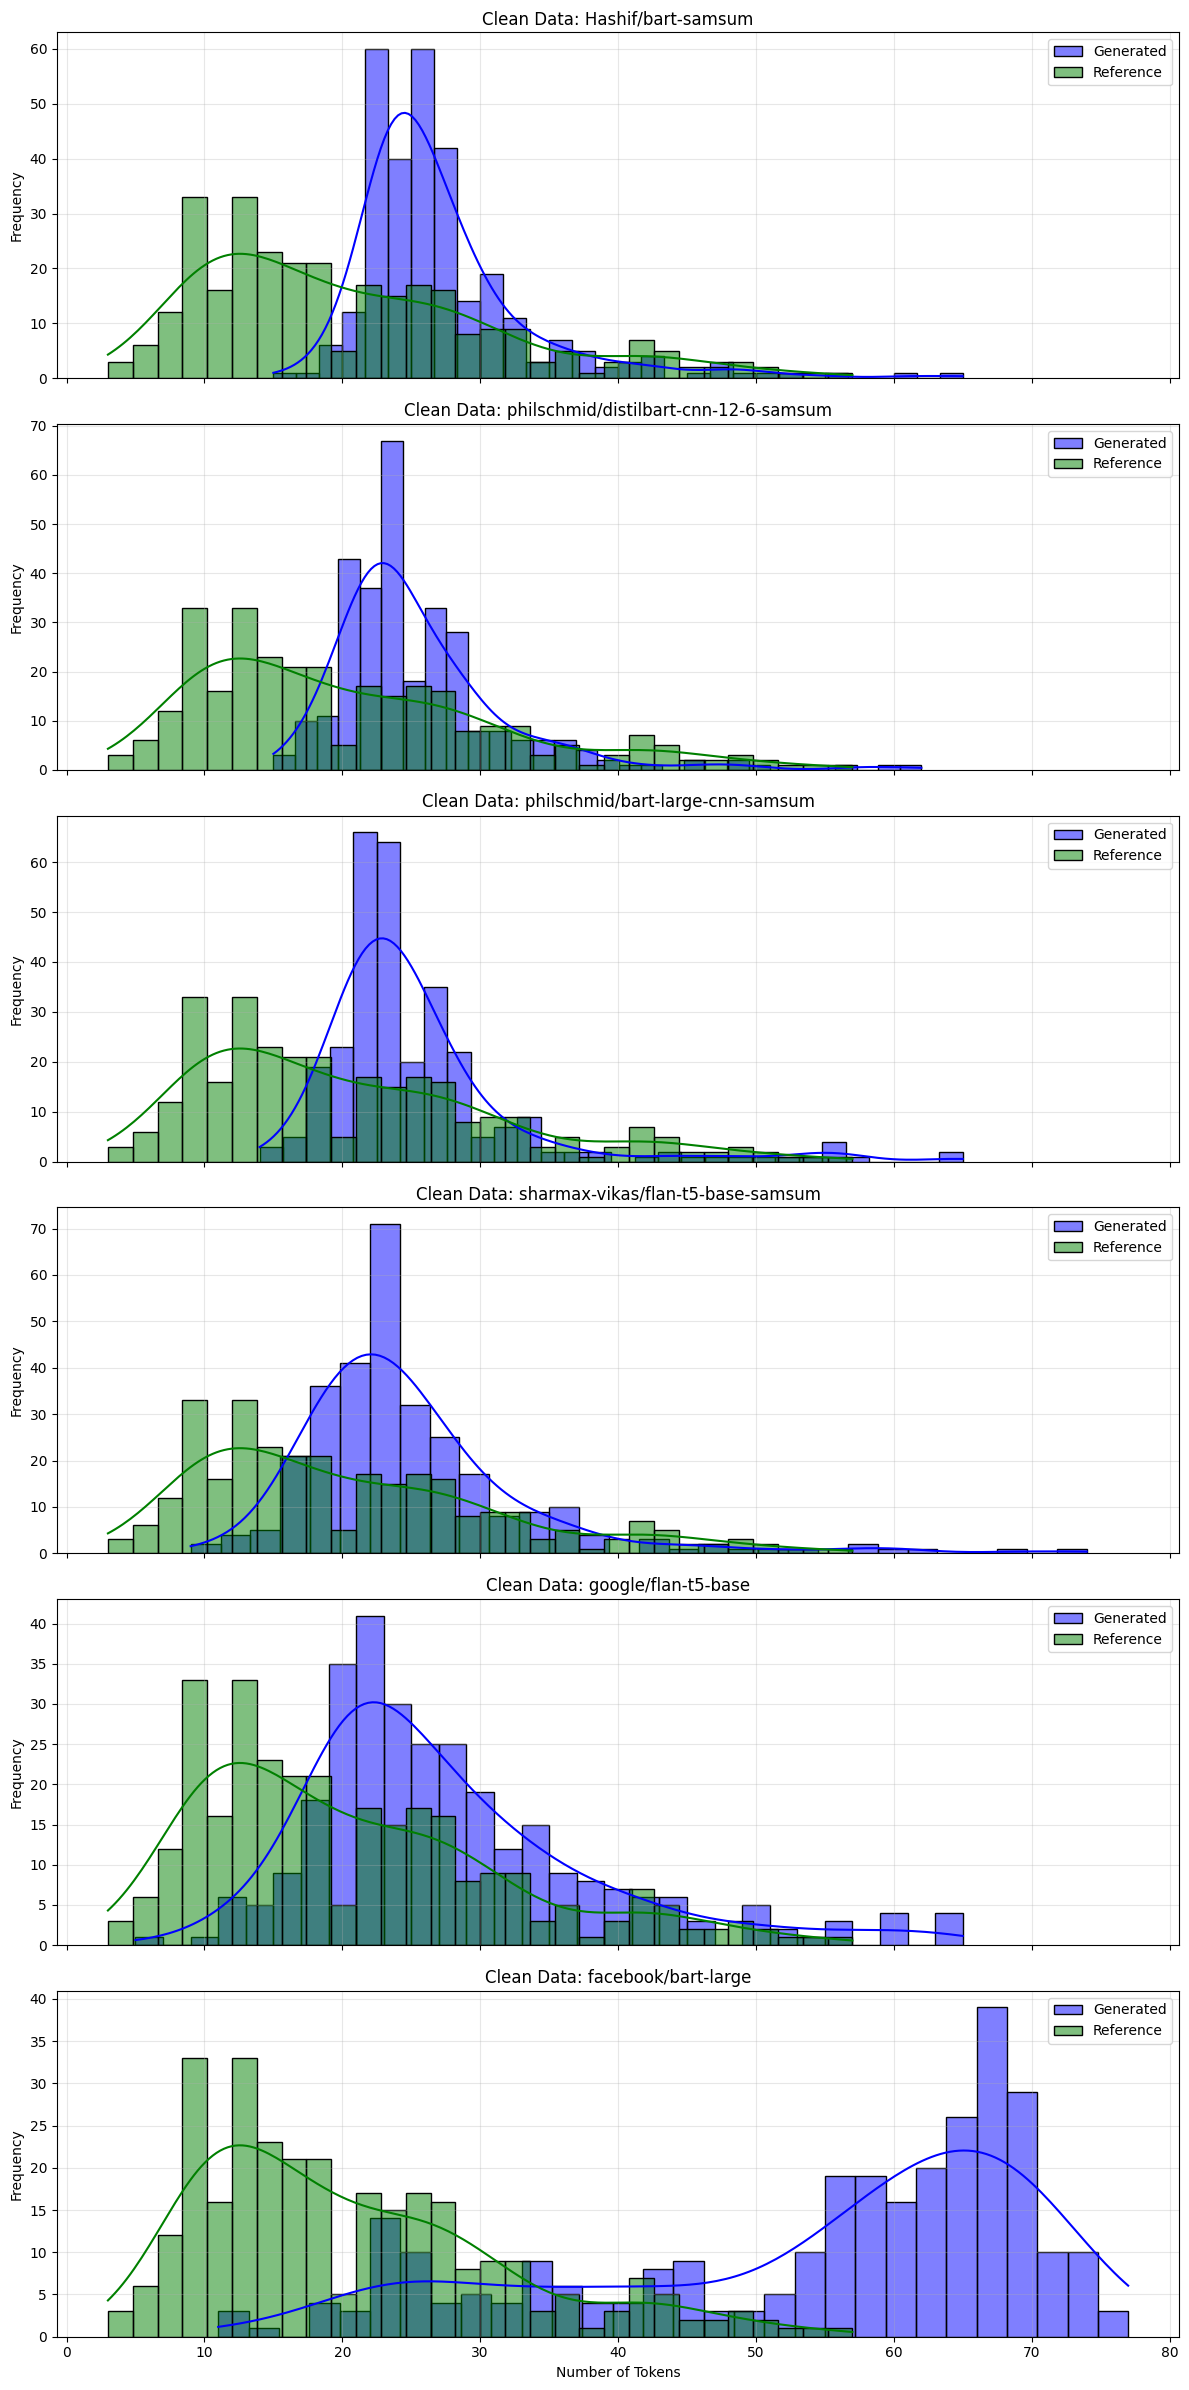

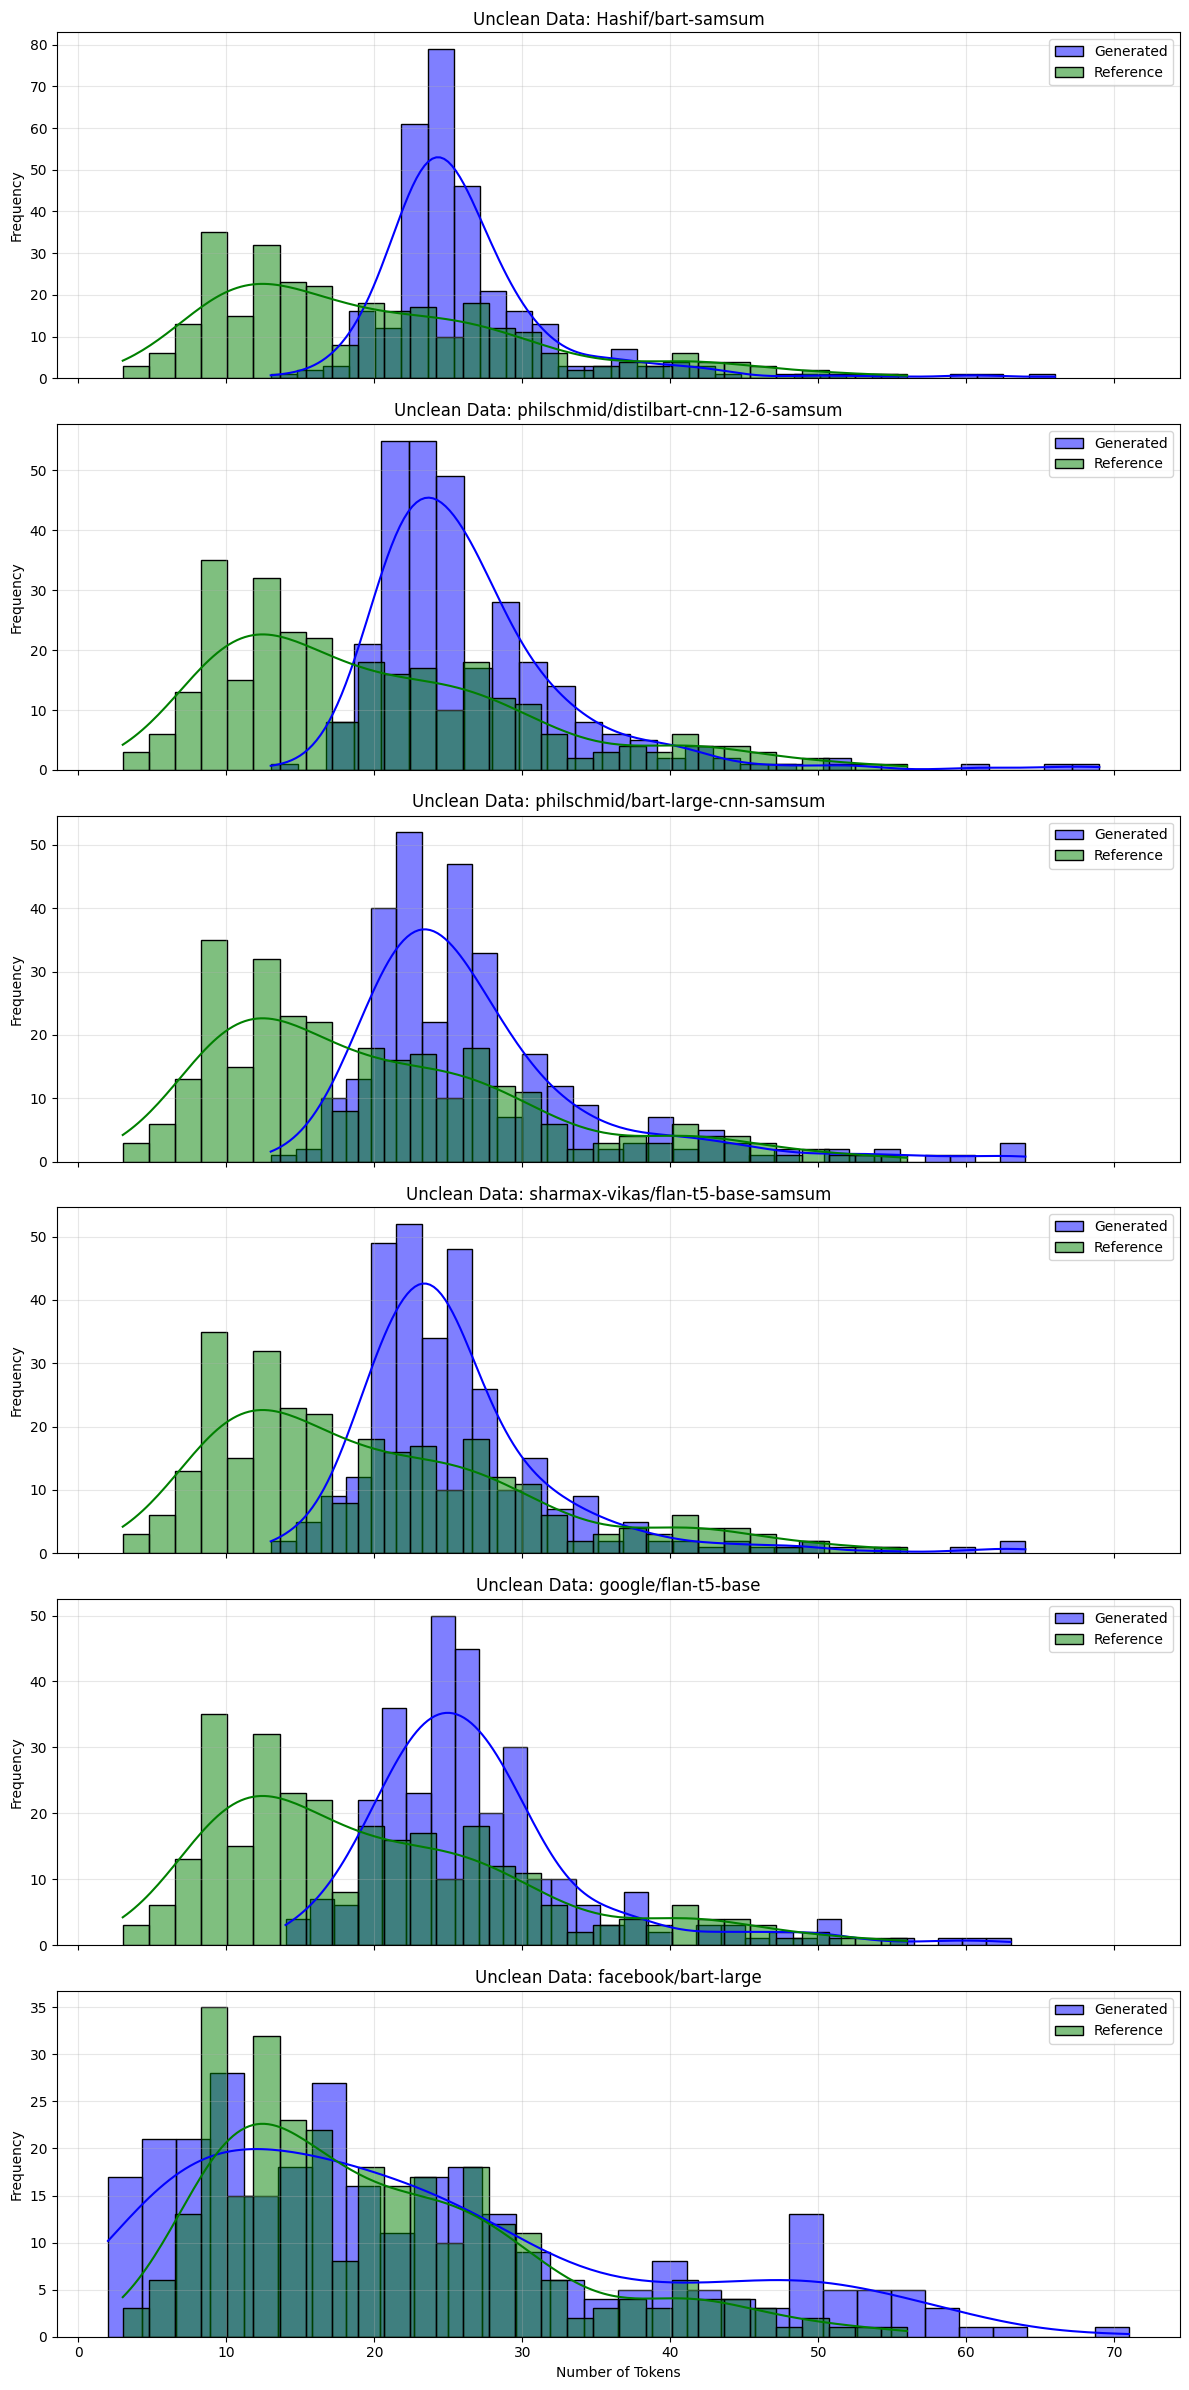

In [19]:
plot_model_summary_distributions(clean_df, unclean_df, save_dir='..plots/')